In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
assets = ['BBAS3.SA', 'BBDC4.SA']
pf_data = pd.DataFrame()

for asset in assets:
    pf_data[asset] = wb.DataReader(
        asset, data_source='yahoo', start='2010-1-1')['Adj Close']

In [6]:
pf_data.tail()

,BBAS3.SA,BBDC4.SA
Date,,
2022-04-08,34.849998,21.480000
2022-04-11,35.070000,21.450001
2022-04-12,35.000000,21.260000
2022-04-13,35.169998,21.480000
2022-04-14,35.200001,21.430000


<AxesSubplot:xlabel='Date'>

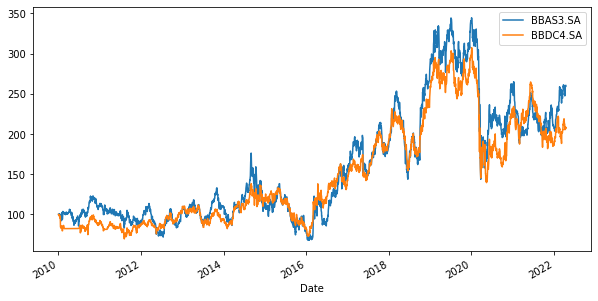

In [7]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10, 5))

In [9]:
log_returns = np.log(pf_data / pf_data.shift(1))

In [10]:
log_returns.mean() * 250

BBAS3.SA    0.078525
BBDC4.SA    0.060119
dtype: float64

In [11]:
log_returns.cov() * 250

,BBAS3.SA,BBDC4.SA
BBAS3.SA,0.167527,0.104227
BBDC4.SA,0.104227,0.117292


In [12]:
log_returns.corr()

,BBAS3.SA,BBDC4.SA
BBAS3.SA,1.000000,0.743536
BBDC4.SA,0.743536,1.000000


In [13]:
num_assets = len(assets)

In [14]:
num_assets

2

In [15]:
arr = np.random.random(2)
arr

array([0.01231838, 0.95257237])

In [16]:
arr[0] + arr[1]

0.9648907509563356

In [18]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.26487505, 0.73512495])

In [19]:
weights[0] + weights[1]

1.0

### Expected Portfolio Returns


In [20]:
np.sum(weights * log_returns.mean()) * 250

0.06499424533222145

### Expected Portfolio Variance:

In [23]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.15219961018789152

### Expected Portfolio Volatility

In [30]:
np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights)))

0.39012768446739526

In [30]:
pfolio_returns = []
pfolio_volatilities = []

for x in range(1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(
        np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))))

pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

In [31]:
portfolios = pd.DataFrame(
    {'Returns': pfolio_returns, 'Volatility': pfolio_volatilities})

In [32]:
portfolios.head()

,Returns,Volatility
0,0.071407,0.360541
1,0.072449,0.366140
2,0.067878,0.346191
3,0.074901,0.381525
4,0.070534,0.356310


Text(0, 0.5, 'Expected Return')

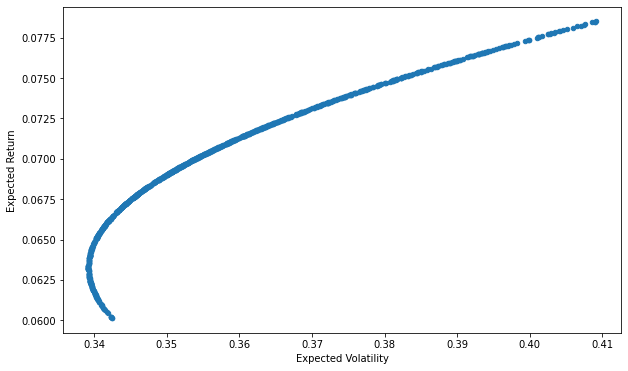

In [33]:
portfolios.plot(x='Volatility', y='Returns', kind='scatter', figsize=(10, 6))
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')